In [1]:
from helper import *

df = load_merged_data(only_turned_off=True)

# Without adding historical data

In [17]:
# split data
train_df, val_df, test_df = split_train_val_test(df, 0.6, 0.2)

X_train, y_train = split_xy(train_df)
X_val, y_val = split_xy(val_df)
X_test, y_test = split_xy(test_df)


input_columns = ['refuellingTimePoint', 'bufferChargingDegree', 'Year sin', 'Year cos', 'weatherTemperature', 'weatherWindX', 'weatherWindY', 'weatherTemperature_12', 'weatherWindX_12', 'weatherWindY_12']

X_train = X_train[input_columns]
X_val = X_val[input_columns]
X_test = X_test[input_columns]

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
print(f'Score: {regressor.score(X_test, y_test):.2%}')

# calculate mean squared error
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE:   {mse:.2f}')
print(f'RSME:  {np.sqrt(mse):.2f}')

Score: 91.10%
MSE:   44.67
RSME:  6.68


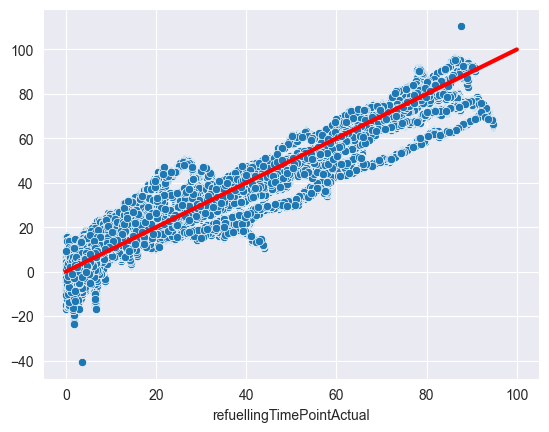

In [5]:
# plot predictions
import seaborn as sns
import matplotlib.pyplot as plt

# plot predictions
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 100], [0, 100], color='red', lw=3)


# With adding historical data

In [21]:
df_history = df\
    .drop(columns=[col for col in df.columns if col.startswith('weather')])\
    .drop(columns=['day', 'operationPhase', 'operationPhaseNumeric', 'refuellingDateActual', 'refuellingTimePointActual', 'refuellingChargingDegreeActual'])

df_history['date'] = df_history['date'] + pd.Timedelta(minutes=5)

df = df.merge(df_history, on='date', how='inner', suffixes=('', '_5_minutes_ago'))

In [22]:
df.head()

,date,outsideTemperature,refuellingQuantity,refuellingTimePoint,prematureRefuellingCount,operationPhase,operationPhaseNumeric,residualOxygen,flueGasTemperature,bufferTemperatureTop,...,bufferUsableEnergyActual_5_minutes_ago_5_minutes_ago,Year sin_5_minutes_ago_5_minutes_ago,Year cos_5_minutes_ago_5_minutes_ago,Anheizen_5_minutes_ago_5_minutes_ago,Anzünden_5_minutes_ago_5_minutes_ago,Ausbrennen_5_minutes_ago_5_minutes_ago,Ausgeschaltet_5_minutes_ago_5_minutes_ago,Automatik_5_minutes_ago_5_minutes_ago,Vorbelüften_5_minutes_ago_5_minutes_ago,Zündung bereit_5_minutes_ago_5_minutes_ago
0,2019-11-12 16:05:14,8.0,35.0,10.9,0.0,Ausgeschaltet,13,0.0,55.0,78.0,...,54.3,-0.751859,0.659324,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2019-11-12 16:05:24,8.0,35.0,10.9,0.0,Ausgeschaltet,13,0.0,55.0,78.0,...,54.4,-0.751858,0.659325,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2019-11-12 16:05:34,8.0,35.0,10.9,0.0,Ausgeschaltet,13,0.0,55.0,78.0,...,54.4,-0.751857,0.659327,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2019-11-12 16:05:44,8.0,35.0,10.9,0.0,Ausgeschaltet,13,0.0,55.0,78.0,...,54.4,-0.751855,0.659328,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2019-11-12 16:05:54,8.0,35.0,10.9,0.0,Ausgeschaltet,13,0.0,55.0,78.0,...,54.3,-0.751854,0.659330,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
#df only with columns date, bufferChargingDegree, bufferChargingDegree_5_minutes_ago, bufferChargingDegree_60_minutes_ago
df[['date', 'bufferChargingDegree', 'bufferChargingDegree_5_minutes_ago']]

,date,bufferChargingDegree,bufferChargingDegree_5_minutes_ago,bufferChargingDegree_5_minutes_ago
0,2019-11-12 16:05:14,47.4,48.4,48.4
1,2019-11-12 16:05:24,47.4,48.3,48.3
2,2019-11-12 16:05:34,47.4,48.4,48.4
3,2019-11-12 16:05:44,47.3,48.4,48.4
4,2019-11-12 16:05:54,47.4,48.3,48.3
...,...,...,...,...
4855634,2023-02-01 07:10:00,46.4,47.9,47.9
4855635,2023-02-01 07:10:10,46.3,47.9,47.9
4855636,2023-02-01 07:10:20,46.3,47.8,47.8
4855637,2023-02-01 07:10:30,46.3,47.8,47.8


In [33]:
# split data
train_df, val_df, test_df = split_train_val_test(df, 0.6, 0.2)

X_train, y_train = split_xy(train_df)
X_val, y_val = split_xy(val_df)
X_test, y_test = split_xy(test_df)


input_columns = ['refuellingTimePoint', 'bufferChargingDegree', 'bufferChargingDegree_5_minutes_ago', 'Year sin', 'Year cos', 'weatherTemperature', 'weatherWindX', 'weatherWindY', 'weatherTemperature_12', 'weatherWindX_12', 'weatherWindY_12']

X_train = X_train[input_columns]
X_val = X_val[input_columns]
X_test = X_test[input_columns]


In [34]:
X_train.head()

,refuellingTimePoint,bufferChargingDegree,bufferChargingDegree_5_minutes_ago,bufferChargingDegree_5_minutes_ago,Year sin,Year cos,weatherTemperature,weatherWindX,weatherWindY,weatherTemperature_12,weatherWindX_12,weatherWindY_12
2,6.250000,21.2,21.2,21.2,0.298561,-0.954391,19.2,-12.124356,-7.000000,16.6,3.762222e+00,-10.336619
3,26.350000,38.1,38.2,38.2,-0.897966,-0.440065,19.3,-11.000000,-19.052559,14.1,-5.362311e+00,-4.499513
4,18.633333,93.5,94.1,94.1,-0.971078,0.238763,16.2,-13.787309,-2.431074,12.4,-1.033662e+01,-3.762222
5,12.200000,34.2,34.3,34.3,-0.973225,-0.229856,15.7,2.431074,13.787309,1.7,0.000000e+00,0.000000
6,24.316667,39.4,39.7,39.7,-0.708738,-0.705471,11.6,-8.999027,-10.724622,15.1,-3.306546e-15,-18.000000


In [35]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
print(f'Score: {regressor.score(X_test, y_test):.2%}')

# calculate mean squared error
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE:   {mse:.2f}')
print(f'RSME:  {np.sqrt(mse):.2f}')

Score: -419527643964611100672.00%
MSE:   2100036095414485385216.00
RSME:  45826150781.13


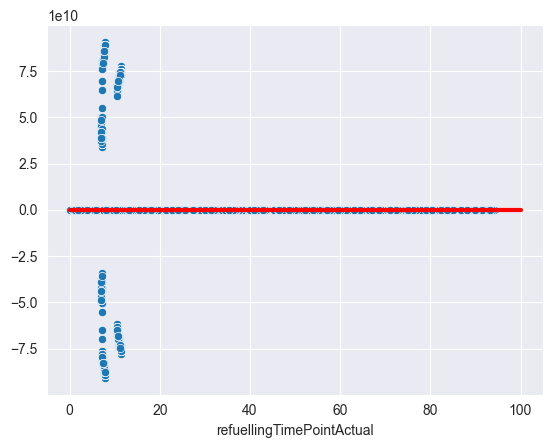

In [28]:
# plot predictions
import seaborn as sns
import matplotlib.pyplot as plt

# plot predictions
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 100], [0, 100], color='red', lw=3)
